# Part I - Ford Go-Bike System Data Exploration And Visualization

## Introduction
> This analysis explores a dataset containing information regarding bike usage in Francisco Bay Ford GoBike sharing system.  


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_0 = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# Make a copy of the dataset to avoid reloading it when it becomes neccesary 
df = df_0.copy()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# overview of data shape and composition
df.shape

(183412, 16)

In [5]:
# changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [6]:
# Engineering new feataures from the start_time column
df['start_month'] = df.start_time.dt.month
df['start_day'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour

# extract the age of members from their birth year
df["member_age"]=df["member_birth_year"].apply(lambda x: x if str(x)=="nan" else 2019-x)

# convert duration in seconds to minutes
df['duration_minutes'] = df['duration_sec'].apply(lambda x: x/60)

In [7]:
# Replace the numbers in start_day with abbreviated weekdays name
df["start_day"]=df["start_day"].replace({0:"Mon", 1:"Tue", 2:"Wed", 3:"Thur", 4:"Fri", 5:"Sat", 6:"Sun"})

# convert start_day, start_hour into ordered categorical types
ordinal_var_dict = {"start_day":["Mon","Tue","Wed","Thur","Fri","Sat","Sun"],
                    "start_hour":list(range(24))}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,member_age,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2,Thur,17,35.0,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,2,Thur,18,NaN,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2,Thur,12,47.0,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2,Thur,17,30.0,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2,Thur,23,45.0,26.416667


In [9]:
df.dtypes.value_counts()

float64           9
object            5
int64             3
datetime64[ns]    2
category          1
category          1
dtype: int64

### What is the structure of your dataset?

> There are 183,412 diamonds in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, etc.) The variables type include numeric, object, and time. However, two categorical variables were extracted from the datetime variable.  

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest would be centered around those variables that would enable me to predict how long it would take to complete an average trip. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that user_type, member's age and gender, and the trip start time to have strong effect on trip duration. 

## Univariate Exploration 

In [11]:
def axes_title(title, x_label, y_label, center=False):
    """This function is to add title and labels to plots.
       Where the parameters are all of string type"""
    if center:
        tit = plt.suptitle(title)
    else:
        tit = plt.title(title)
    return (tit,
    plt.xlabel(x_label),
    plt.ylabel(y_label))

base_color=sb.color_palette()[1]

###  What is the Average Trip Duration?
> I'll start by looking at the distribution of the main variable of interest: Trip Duration.

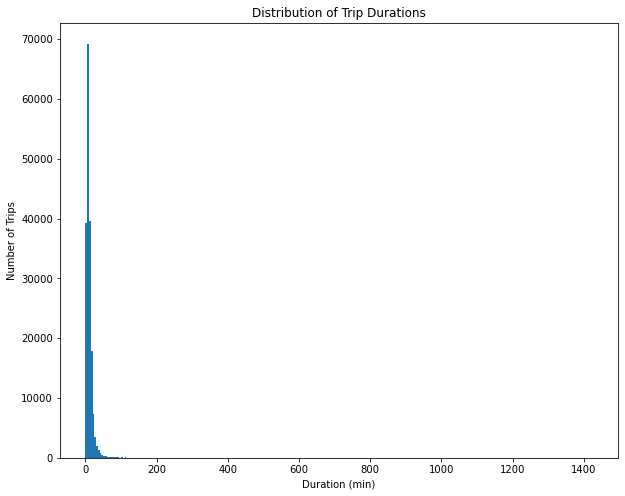

In [13]:
binsize = 5
bins = np.arange(0, df['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
axes_title(title="Distribution of Trip Durations",x_label="Duration (min)", y_label="Number of Trips")
plt.show()

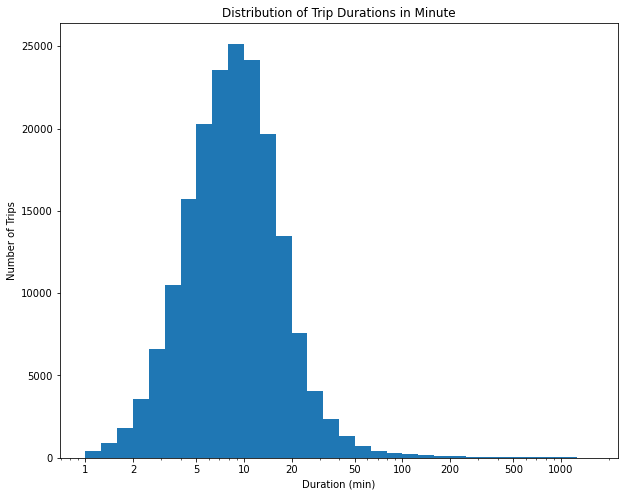

In [14]:
# there's a long tail in the distribution, so let's put it on a log scale instead
# using logarthmic scale transformation on a histogram
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'duration_minutes', bins = log_bins)
axes_title(title="Distribution of Trip Durations in Minute",x_label="Duration (min)", y_label="Number of Trips")
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

> Trip duration has a long-tailed distribution, with most trip taking an average of 4 to 20 minute to complete. When plotted on a log-scale, the trip duration looks unimodal and right skewed peaking between 4 and 20. Very few trips lasted below 3 minute and and above 50 minute

> Next up, the first predictor variable of interest: Members' age.

### Distribution of users' Age

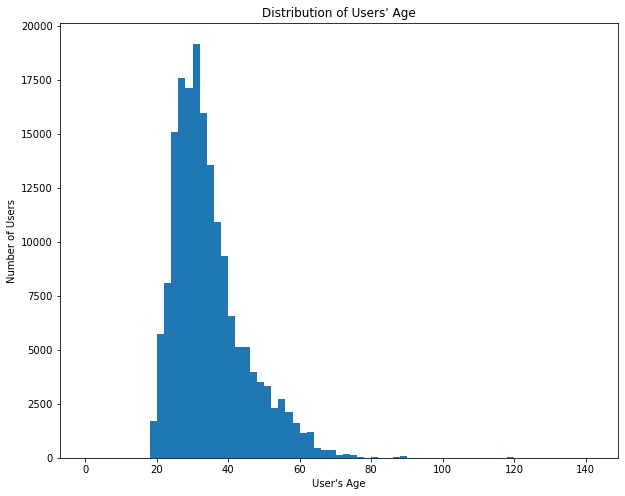

In [15]:
# histogram plot of the age distribtion of users on a standard scale plot 
binsize = 2
bins = np.arange(0, df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df.dropna(), x = 'member_age', bins = bins)
axes_title(title="Distribution of Users\' Age",x_label="User\'s Age", y_label="Number of Users")
plt.show()

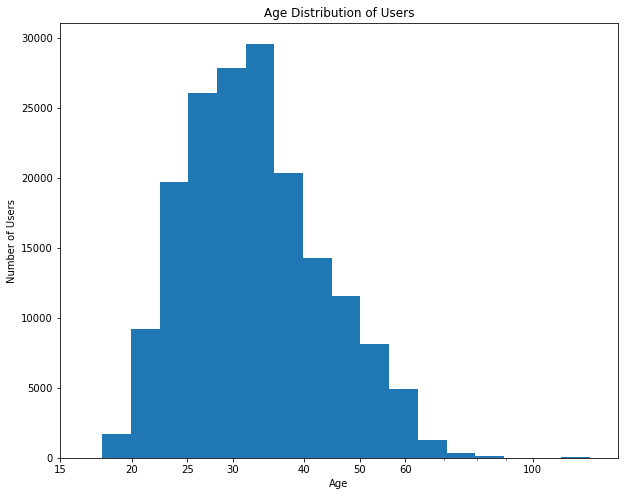

In [16]:
# histogram plot of the age distribtion of users on a log scale
log_binsize = 0.05
log_bins = 10 ** np.arange(0.0, np.log10(df['member_age'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'member_age', bins = log_bins)
axes_title(title="Age Distribution of Users",x_label="Age", y_label="Number of Users")
plt.xscale('log')
tick_locs = [15, 20, 25, 30, 40, 50, 60, 100,150]
plt.xticks(tick_locs, tick_locs)
plt.xlim([15, df.member_age.max()])
plt.show()

> Most users are between the age 25 and 40. The distribution is slightly skewed to the right and there aren't a lot of the users below age 25 and above age 40

### Daily Trip Distribution 

I will now look into the trip start_hour and start_weekday

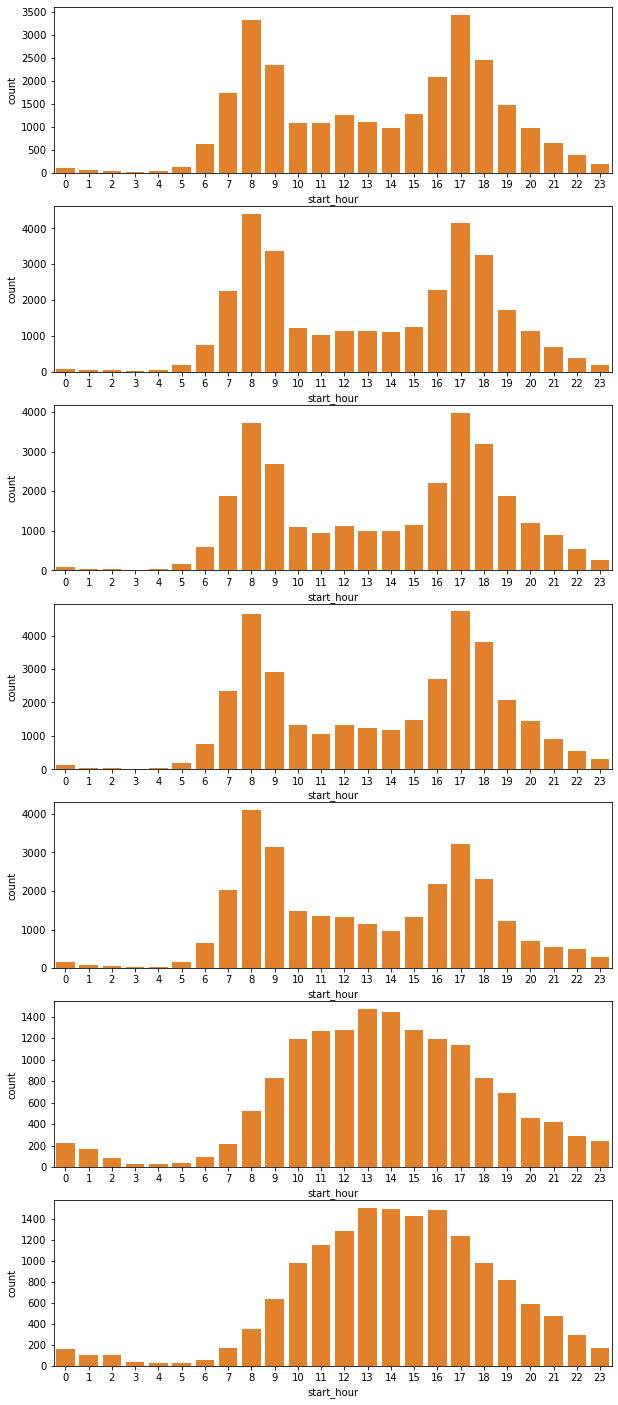

In [17]:
fig, ax = plt.subplots(nrows=7, figsize=[10,25])
days = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
for i,j in enumerate(days):
    sb.countplot(data=df[df["start_day"]==j], x="start_hour", ax=ax[i], color=base_color)

> The distributions of the starting time of trips from Mondays to Fridays are essentially identical with one another and different from those of Saturdays and Sundays. the distribution from Monday to Friday looks bimodal in shape, with one peak between 7:00 and 9:00 hours, and the second peak between 16:00 and 18:00 hours, while those of Saturday and Sunday are unimodal but the distribution is skewed to the left. The distinctions in the shapes of the distribution is expected as Mondays through to Fridays are working days, and usually known to have rush hours in the morning and evening as depicted in the plots. 

### Distribution of User Type

Next I'll look at the distribution of tripe by user type

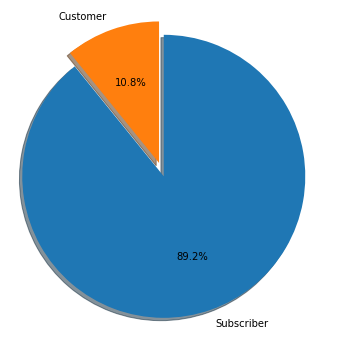

In [18]:
# plot a pie chart
user_category = df['user_type'].value_counts()
plt.figure(figsize=[8, 6])
plt.pie(user_category, explode =  (0, 0.1), labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.show()

Most of the users are actually subscribers rather than customers as shown from the plot above.

### Gender Distribution

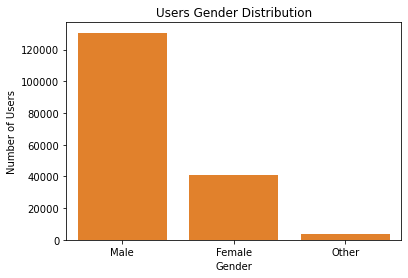

In [19]:
# Plot of gender distribution of users
order = df["member_gender"].value_counts().index
sb.countplot(data = df, x = 'member_gender', color=base_color, order=order)
axes_title(title="Users Gender Distribution",x_label="Gender", y_label="Number of Users")
plt.show();

Males use the bike service overwhelmingly more than females and other genders. Over 120,000 males used the service in the month of February 2019.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The bike duration variable took on a large range of values. I had to perform a log transform. The data looked unimodal under the log transformation with peak between 5 and 20 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Members' age were extracted from their birth year by subtracting their birth year from the current year in the data being 2019, so this gives a distribution for age with richer insight regarding trip duration dependency. 